# Paddy Tutorial
## Optimization of a complex polynomial function

## Prerequisites 
1) Clone the Paddy_Manuscript repo from the Chopra Lab github 
2) Initial the submodule via the terminal
3) Update the submodule via the terminal
4) Initialize the paddy.yml environment via the terminal or use your own environment that has the same dependicies

In this workbook you will optimize a complex polynomial. The goal is to find the max of this function. This function will be known by us in this example, however it can work in scenerios where the function is uknown. You will learn how to use Paddy to find the maximum for this function. The complex polynomial can seen below:

$$(0.80*exp(-(r1)/(0.3**2))) + (0.88*exp(-(r2)/0.03**2))$$
$$r1= ((x-0.5)**2)+((y-0.5)**2)$$
$$r2= ((x-0.6)**2)+((y-0.1)**2)$$

We want to optimize for the max x and the max y. Clearly this would take to long to do manually. Brute force is not always an option when experiments are expensive, samples are limited, or time is of the essence. In these scenerios we want to search the possible parameter space as efficiently as possible to save resources. The aim of this tutorial is to show how one might use Paddy to optimize a complex experiment without having to search the entire parameter space. 

In [1]:
#import all the modules needed
import sys
import math
import random
#Append the 
sys.path.append('/home/sanjay/github/Paddy/Paddy_Manuscript_Repo/paddy')
import paddy
import numpy as np 
import time
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# /home/sanjay/github/paddy/Paddy_Manuscript_Repo

Below is the complex polynomial function being optimized. This polynomial will be stored in function_2. Run the cell below to run Paddy. In the while loop adjust the number in "c < 10" to select the number of results. The deafult is set at 10 to save time. However for more conclusive results try setting the results to 100 by changing the code to "c <100" 

In [2]:
np.random.seed(5)
rs=np.random.RandomState(5)
random.seed(5)

def function_2(input):
    x=input[0,0]
    y=input[1,0]
    r1=((x-0.5)**2)+((y-0.5)**2)
    r2=((x-0.6)**2)+((y-0.1)**2)
    result = (0.80*math.exp(-(r1)/(0.3**2))) + (0.88*math.exp(-(r2)/0.03**2))
    #global maximum at (0.6,0.1) with local at (0.5,0.5)
    return (result)

i = ['generational', 'scaled', 50, 100, 5, False]

y_param = paddy.PaddyParameter(param_range=[0,1,.01],param_type='continuous',limits=[0,1,.1], gaussian='scaled',normalization = False)
x_param = paddy.PaddyParameter(param_range=[0,1,.01],param_type='continuous',limits=[0,1,.1], gaussian='scaled',normalization = False)
class space(object):
        def __init__(self):
                self.xp = x_param
                self.yp = y_param

test_space = space()
c = 0
g = 0
r_list = []
while c<10:
    runner = paddy.PFARunner(space=test_space, eval_func=function_2,
                            paddy_type='generational', rand_seed_number=50,
                            yt=50,Qmax=100,r=.02,iterations=5)
    s = time.time()
    runner.run_paddy()
    e = time.time() - s
    if max(runner.seed_fitness) > 0.81:
        g +=1
    print(g,c)
    f=(max(runner.seed_fitness))
    print(len(runner.seed_fitness))
    print(f)
    p=runner.seed_params[np.argmax(runner.seed_fitness)]
    r_list.append([p,f,e])
    c += 1


p1 = [] 
p2 =[]
p3 = []
for i in r_list:
        p1.append(i[0])
        p2.append(i[1])
        p3.append(i[2])

#Hardcode this to save the file as a new name        
np.save("Paddy_MinMax_tutorial",r_list)

paddy is done!
0 0
9875
0.8087470479619501
paddy is done!
1 1
6241
0.8436929740217239
paddy is done!
1 2
8975
0.7999998540045756
paddy is done!
2 3
5578
0.9585602312172932
paddy is done!
3 4
6776
0.8399813883901537
paddy is done!
3 5
8129
0.8011666822665332
paddy is done!
4 6
6189
0.9959425655241365
paddy is done!
4 7
8616
0.7999961049773479
paddy is done!
5 8
7870
0.8954843806726931
paddy is done!
6 9
7489
0.8767020171424017


/home/sanjay/anaconda3/envs/paddy/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


List of fitness values:
[0.7643732156993034, 0.8767020171424017, 0.7993936746358923, 0.7999050538828492, 0.7999765212539041, 0.7999991414562526]
0:seed_seed_37:Fitness:0.7643732156993034  Parameters:
[0.55, 0.54]
1:seed_seed_215:Fitness:0.8767020171424017  Parameters:
[0.5911258073491626, 0.10851835197288112]
2:seed_seed_738:Fitness:0.7993936746358923  Parameters:
[0.49786182585533206, 0.49202092255500673]
3:seed_seed_1926:Fitness:0.7999050538828492  Parameters:
[0.49788342380791956, 0.5024904170942667]
4:seed_seed_3267:Fitness:0.7999765212539041  Parameters:
[0.5014572617155659, 0.4992804265230201]
5:seed_seed_5255:Fitness:0.7999991414562526  Parameters:
[0.4998465350426201, 0.5002702493853183]


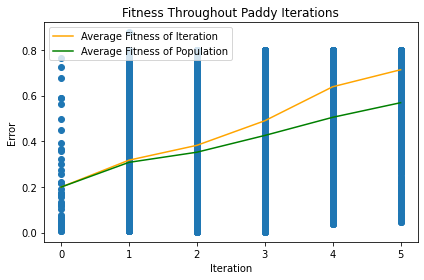

In [3]:
#Results
runner.get_top_seed()
runner.paddy_plot_and_print('pop_fitness')
runner.paddy_plot_and_print('final_results')
#plotting the results
runner.paddy_plot_and_print(('scatter','average_gen','average_population'))

Below is the code for a contour plot of our experimental search space. The blue dot represents the final result from 1 instance. There is a big wide hill and a narrow pointed hill. The narrow pointed hill is the global maxima we are trying to find. However due to the complexity of the polynomial, it can be easy to get stuck in the big wide hill which is a local maxima. 

Now we will plot our results and compare them to hyperopt. Here we can see the difference between how a Bayesian Optimization (BO) model performs vs Paddy, an Evolutionary Algorithm (EA). Paddy is better at exploring the parameter space which means it is less likely to get stuck in the local maxima than a BO method. Try running paddy first with 10 results, and then 100 results to see how the plot changes. 

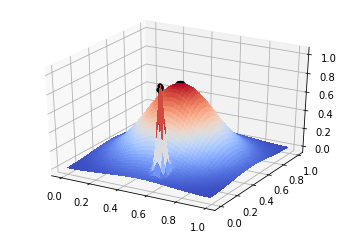

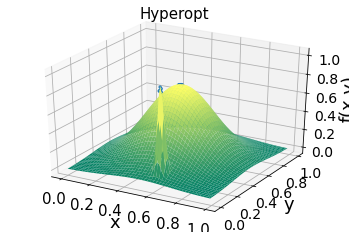

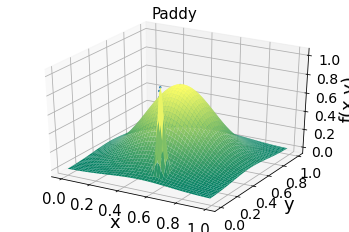

In [4]:
###Surface plot

def function_2(x,y):
    r1=((x-0.5)**2)+((y-0.5)**2)
    r2=((x-0.6)**2)+((y-0.1)**2)
    result = (0.80*math.exp(-(r1)/(0.3**2))) + (0.88*math.exp(-(r2)/0.03**2))
    #global maximum at (0.6,0.1) with local at (0.5,0.5)
    return (result)
X = np.arange(0, 1, 0.01)
Y = np.arange(0, 1, 0.01)
X, Y = np.meshgrid(X, Y)

Z = np.empty([100,100])

c = 0
for i in Z:
	c2 = 0
	for i2 in i:
		Z[c][c2] = function_2(X[c][c2],Y[c][c2])
		c2 += 1
	c += 1

#hardcode this to your directory and file name
h_list = np.load('/home/sanjay/github/Paddy/Paddy_Manuscript_Repo/tutorials/Hyperopt_MinMax.npy', allow_pickle=True)
#h_list = np.load('/home/sanjay/github/Paddy/Paddy_Manuscript_Repo2/Paddy_Manuscript_Repo/Plotting/MinMax/Hyperopt_MinMax.npy')

xs=[]
ys=[]
zs=[]
for i in h_list:
	xs.append(i[0]['x'])
	ys.append(i[0]['y'])
	zs.append(-i[1])

#hardcode this to your directory and file name
p_list = np.load('/home/sanjay/github/Paddy/Paddy_Manuscript_Repo/tutorials/Paddy_MinMax_tutorial.npy', allow_pickle=True)
#p_list = np.load('/home/sanjay/github/Paddy/Paddy_Manuscript_Repo2/Paddy_Manuscript_Repo/Plotting/MinMax/Paddy_MinMax.npy')

xs2=[]
ys2=[]
zs2=[]
for i in p_list:
	xs2.append(i[0][0][0])
	ys2.append(i[0][1][0])
	zs2.append(i[1])


fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

pos = ax.scatter(xs,ys,zs,c='k')

plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.summer)
pos = ax.scatter(xs,ys,zs,s=5,c='#8ac6d1ff',edgecolors='#1f77b4ff')
ax.set_zlabel('f(x,y)',fontsize=18)
ax.set_xlabel('x',fontsize=18)
ax.set_ylabel('y',fontsize=18)
ax.zaxis.set_tick_params(labelsize=14,size=15)
ax.xaxis.set_tick_params(labelsize=15,size=15)
ax.yaxis.set_tick_params(labelsize=14,size=15)
ax.set_title('Hyperopt',fontsize=15)
plt.savefig(fname='hpf2.svg',dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.summer)
pos = ax.scatter(xs2,ys2,zs2,s=2,c='#8ac6d1ff',edgecolors='#1f77b4ff')
ax.set_zlabel('f(x,y)',fontsize=18)
ax.set_xlabel('x',fontsize=18)
ax.set_ylabel('y',fontsize=18)
ax.zaxis.set_tick_params(labelsize=14,size=15)
ax.xaxis.set_tick_params(labelsize=15,size=15)
ax.yaxis.set_tick_params(labelsize=14,size=15)
ax.set_title('Paddy',fontsize=15)
plt.savefig(fname='paddyf2.svg',dpi=300)
plt.show()